# Στοχαστικές Ανελίξεις : 3η Εργαστηριακή Άσκηση
Όνομα: Μάριος Παπαχρήστου

ΑΜ: 03115101 (ΗΜΜΥ ΕΜΠ)

email: papachristoumarios@gmail.com

In [3]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# to plot the results in the notebook:
%matplotlib inline

### Ερωτήσεις κατανόησης

1. Γιατί σε λογαριθμική κλίμακα βλέπουμε μια ευθεία;
2. Εκτιμήστε γραφικά την κλίση της ευθείας και το σημείο που τέμνει τον άξονα $logx=0$.
3. Δοκιμάστε να κατασκευάσετε ίδιο γράφημα τις γραφικές παρατάσεις των συναρτήσεων $y = 8x^3$ και $y = 8x^2$. Πως αλλάζει η κλίση για τις 2 αυτές συναρτήσεις;

### Απαντήσεις
1. Διότι είναι $\log f(x) = \log 3 + 2 \log x$ που είναι γραμμική συνάρτηση του $\log x$
2. Γραφικά η κλίση της ευθείας που τένει τον άξονα βρίσκεται ίση με
3. Για τις $y_1 = 8x^3, y_2 = 8x^2$ έχουμε τις εξής 2 γραφικές παραστάσεις. Η κλίση των συναρτήσεων στο log-log γράφημα είναι 3 και 2 αντίστοιχα ενώ οι κλίσεις των συναρτήσεων είναι $y_1' = 24x^2, y_2' = 16x$


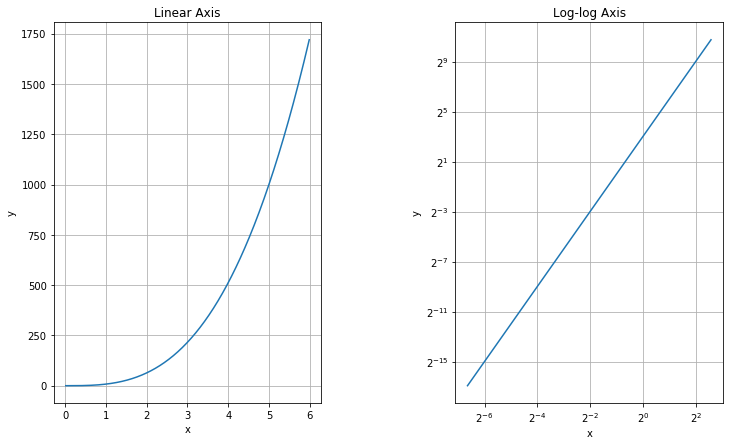

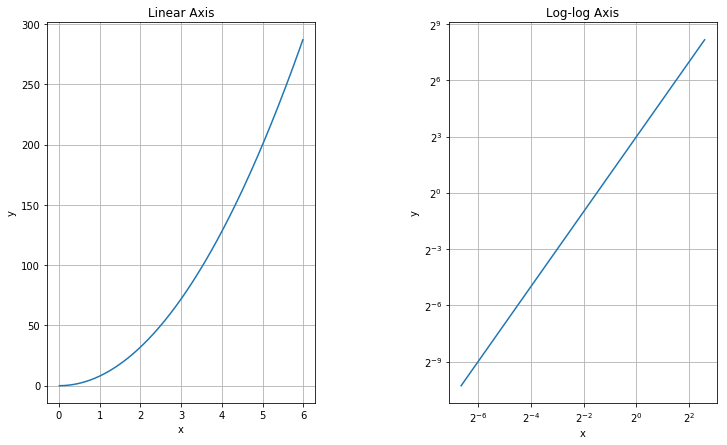

In [13]:
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]

y1 = 8 * ( x ** 3 )
y2 = 8 * ( x ** 2 )

for yy in [y1, y2]:
    plt.figure(figsize=(12, 7))  # define figure size

    # Right Axes
    plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
    plt.plot(x, yy)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Axis')
    plt.grid(True)  # add grid-lines

    # Left Axes
    plt.subplot(1, 2, 2) # select the 2nd subplot
    plt.loglog(x, yy, basex=2, basey=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Log-log Axis')
    plt.grid(True)

    plt.subplots_adjust(wspace = 0.5)  # specify the width space

## Παραδοτέο 1. 

Τώρα που μάθατε να κάνετε γραφικές παραστάσεις, μπορείτε να καταλάβετε καλύτερα πώς εξαρτάται η πιθανότητα νίκης $F(p)$ του παίκτη που σερβίρει στο τένις από την πιθανότητα $p$ που έχει να κερδίσει έναν πόντο. Αλλάξτε τον κώδικα που φτιάξατε για το προηγούμενο εργαστήριο ώστε να εκτιμά την πιθανότητα νίκης για μια σειρά από $p=0.02,0.04,\ldots,0.98$ και κάντε τη γραφική παράσταση αυτής της συνάρτησης. Φροντίστε ώστε το πλήθος των δειγμάτων που θα πάρετε για κάθε τιμή του $p$ να είναι αρκετά μεγάλο ώστε η γραφική παράσταση της συνάρτησης να φαίνεται ομαλή. 

Σε ένα καινούργιο jupyter notebook βάλτε ένα κελί με τον κώδικά σας και τρέξτε το ώστε να φανεί η γραφική παράσταση. Στη συνέχεια, σε ένα κελί κειμένου σχολιάστε τη μορφή της γραφικής παράστασης. 

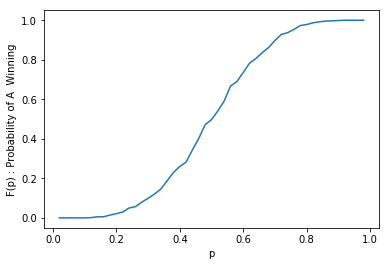

In [14]:
import random
random.seed(2018)
from simple_markov_chain_lib import markov_chain

# monte carlo experiment
def experiment(mc, N = 200, steps = 20, state = 3, runs = 50):
    estimates = []
    for r in range(runs):
        counter = 0
    
        for i in range(N):
            mc.start()  
            for j in range(steps):  mc.move()
            if mc.running_state == state:  counter += 1
        phat = counter / N    
        estimates.append(phat)
    return np.array(estimates)

pp = np.arange(0.02, 1.0, 0.02)
result = []

for p in pp:
    init_probs_tennis = {'0-0' : 1.}
    matrix = {
        '0-0' : {'15-0' : p, '0-15' : 1 - p},
        '15-0' : {'30-0': p, '15-15' : 1 - p},
        '0-15' : {'15-15': p, '0-30' : 1 - p},
        '30-0' : {'40-0' : p, '30-15' : 1 - p},
        '15-15' : {'30-15' : p, '15-30' : 1-p},
        '0-30' : {'15-30' : p, '0-40' : 1-p},
        '40-0' : {'40-15' : 1 - p, 'GameA' : p},
        '30-15' : {'40-15' : p, 'Deuce' : 1 - p},
        '15-30' : {'Deuce' : p, '15-40' : 1-p},
        '0-40' : {'15-40' : p, 'GameB': 1 - p},
        '40-15' : { 'GameA' : p, 'AdvA' : 1 - p},
        '15-40' : {'GameB' : 1 - p, 'AdvB' : p},
        'GameA' : {'GameA' : 1.0},
        'GameB' : {'GameB' : 1.0},
        'AdvA' : {'GameA' : p, 'Deuce' : 1-p},
        'AdvB' : {'GameB' : 1-p, 'Deuce' : p},
        'Deuce' : {'AdvA' : p, 'AdvB': 1-p}
    }

    tennis = markov_chain(matrix, init_probs_tennis)
    estimates_tennis = experiment(tennis, N = 2000, steps = 20, state = 'GameA', runs = 1)
    result.append ( np.mean ( estimates_tennis ))
    
    
plt.plot(pp, result);    
plt.ylabel('F(p) : Probability of A  Winning');
plt.xlabel('p');

## Άσκηση 87

Σε αυτή την άσκηση θα μελετήσουμε την διακύμανση του χρόνου απορρόφησης μιας αλυσίδας Markov.
Στο παρακάτω κελί δημιουργούμε μια αλυσίδα Markov που ζει στο χώρο καταστάσεων $\mathbb{X} = \{0, 1, 2, 3, 4\}$ με πίνακα πιθανοτήτων μετάβασης

$$
P = 
\begin{pmatrix}
2/5   & 1/2 & 1/10 &  0  & 0 \\
1/3 &  0  &  0  & 2/3 & 0 \\
0   &  0  &  1  &  0  & 0 \\
1/2 &  1/8  &  0  & 1/4 & 1/8 \\
0   &  0  &  0  &  0  & 1 
\end{pmatrix}
$$

και αρχική κατανομή: 

$$ \pi_0 = (1, 0, 0, 0, 0 ) $$

τα οποία ορίζουμε για να δημιουργήσουμε νέο αντικείμενο:

In [15]:
# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = markov_chain(markov_table, init_dist)

## Παραδοτέο 2

Υπολογίζουμε την διασπορά της εκτιμήτριας $E_N$ για $N$ (`sample_size`) $2^5, \dots, 2^{12}$ και $M = 30$

Polyfit yielded: p = -1.0122346373222253, q = 2.320225534208991


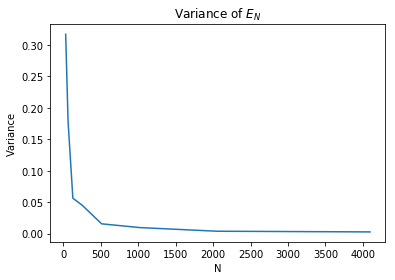

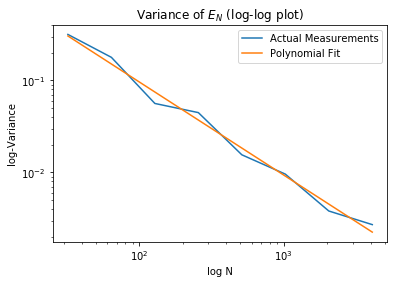

In [17]:
import statistics as stat
M = 30
result = []
NN = []
for k in range(5, 13):
    tmp = []
    sample_size = 2 ** k  # Ν
    NN.append(sample_size)
    for j in range(M):
        running_total = 0

        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4: mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        mc_estimate = running_total / sample_size
        tmp.append ( mc_estimate )
    result.append( stat.variance ( tmp ) )
    
NN, result = np.array(NN), np.array(result)
    
plt.figure();   

plt.plot(NN, result);
plt.title('Variance of $E_N$')
plt.xlabel('N')
plt.ylabel('Variance')

plt.figure();
plt.title('Variance of $E_N$ (log-log plot)')
plt.xlabel('log N')
plt.ylabel('log-Variance')
plt.loglog(NN, result, label='Actual Measurements');

p, q = np.polyfit(np.log (NN) , np.log(result), 1)  
print('Polyfit yielded: p = {}, q = {}'.format(p,q))

plt.loglog(NN, np.exp (q) * (NN ** p), label='Polynomial Fit')    
plt.legend();

Παρατηρούμε ότι η διασπορά $Var (E_N)$ για διάφορες τιμές του $N$ έχει στο λογαριθμικό διάγραμμα μορφή ευθείας με κλίση $p$ και σταθερό όρο $q$. Αυτό σημαίνει ότι η διασπορά έχει μορφή $Var (E_Ν) = \Theta  (1 / Ν) $ το οποίο επαληθεύεται και **θεωρητικά** για τον εξής λόγο:

Για κάθε $N$ στο σύνολο των δεικτών έχουμε ότι
$$E_N = \frac 1 M \sum_{j = 1}^M {\hat T_{i,N} } = \frac {1} {NM} \sum_{i = 1, j = 1}^{i \le N, j \le M} \tilde T_{ij}$$
με διασπορά 

$$Var (E_N) = \frac  {Var (\tilde T_{11})} {Ν Μ } \in \Theta ( 1 / Ν ) $$

Διότι οι $\tilde T_{ij}$ είναι iid όπου $\tilde T_{ij} = \inf \{ k \ge 0 : X_k \in A \mid X_0 = 0\}$, όπου $A = \{2 ,4\}$ με διασπορά 

$$Var (\tilde T_{11}) = \mathbb E \tilde T_{11}^2 - (\mathbb E \tilde T_{11} )^2 = H_A (0) - G_A^2 (0) \in \Theta (1)$$

Όπου το $G_A (x) = \mathbb E_x [T_A]$ κατά τα γνωστά το οποίο επιλύει το ΠΣΤ (και δεν εξαρτάται από το Ν)
$$L g(x) = - 1, x \notin A, \qquad g(x) = 0, x \in A$$
ενώ η $H_A(x) = \mathbb E_x [T_A^2]$ επιλύει κάποιο παρόμοιο ΠΣΤ και δεν εξαρτάται από το $N$

